# Retail Web Session Intelligence (RWSI)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("rwsi_data.csv")

In [3]:
df.head(10)

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No
5,4VMhpHx3vORvMBM6,2.0,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,February,NaN,Chrome,North America,3.0,Returning,False,No
6,Sh1EYwNiXcpybejd,4.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,February,Android,Edge,Asia-Pacific,3.0,Returning,False,No
7,qAu6Pi4UMWbv6CUs,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,February,Windows,Chrome,North America,5.0,NaN,True,No
8,isv5YRz1f8xaebTG,NaN,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,February,Android,Chrome,Europe,3.0,Returning,False,No
9,fhZ1zBBiKD6zN76T,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.022222,0.0,0.4,February,Android,Edge,North America,2.0,Returning,False,No


In [4]:
df.tail(10)

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
12320,vPpuIKbXQLodrkD0,2.0,0.0,0.00,0.0,0.0,8.0,143.583333,0.014286,0.050000,0.000000,0.0,November,Android,Chrome,Asia-Pacific,1.0,Returning,False,No
12321,K2FUwOvMVC3ydgb9,4.0,0.0,0.00,0.0,0.0,6.0,0.000000,0.200000,0.200000,0.000000,0.0,November,Windows,UC Browser,South America,1.0,Returning,False,No
12322,53XtSYR4eHeB1z8r,3.0,6.0,76.25,0.0,0.0,22.0,1075.250000,0.000000,0.004167,0.000000,0.0,December,Android,Chrome,South America,2.0,Returning,False,No
12323,TI5UUwAhkBsvjhe4,3.0,2.0,64.75,0.0,0.0,44.0,1157.976190,0.000000,0.013953,0.000000,0.0,November,Android,NaN,North America,10.0,Returning,False,No
12324,TXR9O5W3jbIS8ESN,1.0,0.0,0.00,1.0,0.0,16.0,503.000000,0.000000,0.037647,0.000000,0.0,November,Android,Chrome,NaN,1.0,Returning,False,No
12325,0klh9UGQ7BkQUKcO,2.0,NaN,NaN,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,December,MacOS,Samsung Internet,NaN,1.0,Returning,True,No
12326,rgkzdXgYy7i23QCr,4.0,0.0,0.00,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,November,iOS,Chrome,North America,8.0,Returning,True,No
12327,5xHywHohA2mfMYDO,NaN,0.0,0.00,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,November,iOS,Chrome,North America,13.0,Returning,True,No
12328,FyZui9xWv1oHHfZt,NaN,4.0,75.00,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,November,Android,Chrome,NaN,11.0,Returning,False,No
12329,QkRe90N3wFinGbM5,3.0,0.0,0.00,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,November,iOS,Chrome,North America,2.0,New,True,No


In [5]:
print("(sessions, features): ",df.shape) #(rows, columns)

(sessions, features):  (12330, 20)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               11467 non-null  float64
 2   InfoSectionCount       11961 non-null  float64
 3   InfoSectionTime        11961 non-null  float64
 4   HelpPageVisits         12084 non-null  float64
 5   HelpPageTime           12084 non-null  float64
 6   ItemBrowseCount        11837 non-null  float64
 7   ItemBrowseTime         11837 non-null  float64
 8   ExitRateFirstPage      12207 non-null  float64
 9   SessionExitRatio       12084 non-null  float64
 10  PageEngagementScore    11961 non-null  float64
 11  HolidayProximityIndex  11837 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         11837 non-null  object 
 14  WebClientCode          11714 non-null  object 
 15  Ma

In [7]:
print(df.isnull().sum()) #missing values in each column

SessionID                  0
AdClicks                 863
InfoSectionCount         369
InfoSectionTime          369
HelpPageVisits           246
HelpPageTime             246
ItemBrowseCount          493
ItemBrowseTime           493
ExitRateFirstPage        123
SessionExitRatio         246
PageEngagementScore      369
HolidayProximityIndex    493
VisitMonth                 0
UserPlatformID           493
WebClientCode            616
MarketZone               616
TrafficSourceCode        616
UserCategory             493
IsWeekendVisit             0
MonetaryConversion         0
dtype: int64


In [8]:
df.describe() # describe for stastical vibe check on the numerical data columns (mean, std, max, min, etc).

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,TrafficSourceCode
count,11467.000000,11961.000000,11961.000000,12084.000000,12084.000000,11837.000000,11837.000000,12207.000000,12084.000000,11961.000000,11837.000000,11714.000000
mean,1.993459,2.318201,80.871460,0.502565,34.420615,31.717749,1196.681677,0.022234,0.043130,5.885423,0.061806,4.069489
std,1.420444,3.326956,177.208946,1.271441,141.209531,44.390208,1918.148954,0.048551,0.048623,18.557293,0.199556,4.031417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000
50%,2.000000,1.000000,8.000000,0.000000,0.000000,18.000000,598.250000,0.003125,0.025222,0.000000,0.000000,2.000000
75%,3.000000,4.000000,92.933333,0.000000,0.000000,38.000000,1469.666667,0.016923,0.050000,0.000000,0.000000,4.000000
max,4.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,20.000000


## Visualizing Missing Data

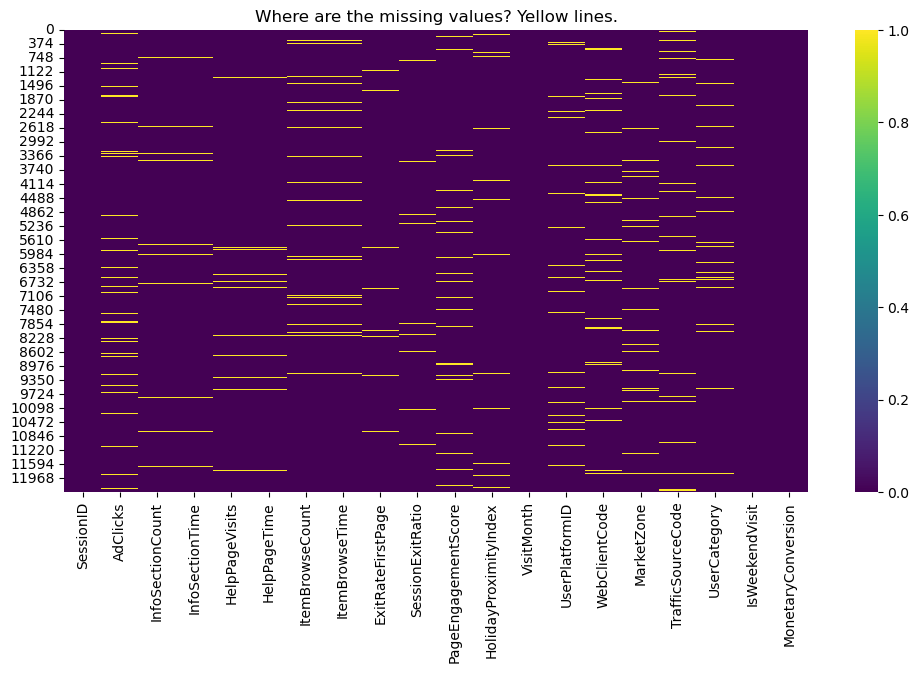

In [9]:
plt.figure(figsize=(12,6))         
sns.heatmap(df.isnull(), cmap='viridis')        
plt.title("Where are the missing values? Yellow lines.")  
plt.show()  

## Handling Missing Data (Imputation)

In [10]:
# Numeric columns, imputed with their respective median
for col in df.select_dtypes(include=['float64']).columns: 
    median_val = df[col].median()                        
    df[col].fillna(median_val, inplace=True)           

# Object columns (categorical/text), imputed with their respective mode
for col in df.select_dtypes(include=['object']).columns: 
    mode_val = df[col].mode()[0]                         
    df[col].fillna(mode_val, inplace=True) 

print(df.isnull().sum())      # to check if any missing value still persist

SessionID                0
AdClicks                 0
InfoSectionCount         0
InfoSectionTime          0
HelpPageVisits           0
HelpPageTime             0
ItemBrowseCount          0
ItemBrowseTime           0
ExitRateFirstPage        0
SessionExitRatio         0
PageEngagementScore      0
HolidayProximityIndex    0
VisitMonth               0
UserPlatformID           0
WebClientCode            0
MarketZone               0
TrafficSourceCode        0
UserCategory             0
IsWeekendVisit           0
MonetaryConversion       0
dtype: int64


## Exploratory Data Analysis (EDA)

### How many people actually bought (MonetaryConversion = 1) and how many only browse (MonetaryConversion = 0)?

MonetaryConversion
No     10422
Yes     1908
Name: count, dtype: int64


Text(0, 0.5, 'No. of Sessions')

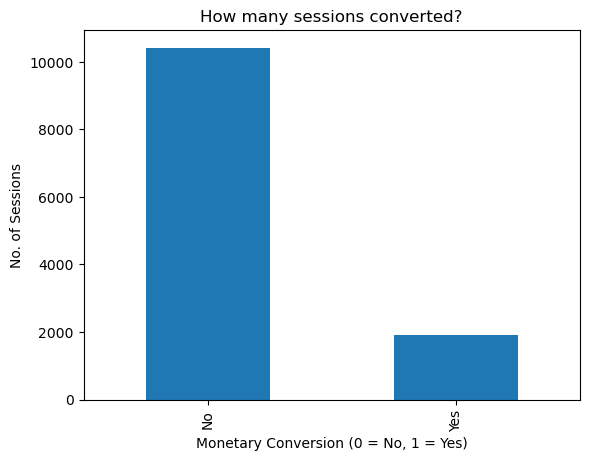

In [11]:
print(df['MonetaryConversion'].value_counts())

#visualize (Bar Graph)
df['MonetaryConversion'].value_counts().plot(kind='bar') 
plt.title('How many sessions converted?')
plt.xlabel('Monetary Conversion (0 = No, 1 = Yes)')
plt.ylabel('No. of Sessions')

### Compare features for Buyers and Non-Buyers to see if they act differently from each other

In [12]:
df_eda = df.copy()
df_eda['MonetaryConversion'] = df_eda['MonetaryConversion'].map({'No':0, 'Yes':1})
df_eda.groupby('MonetaryConversion')[['ItemBrowseCount', 'AdClicks', 'ItemBrowseTime', 'HelpPageTime', 'HolidayProximityIndex']].mean()

,ItemBrowseCount,AdClicks,ItemBrowseTime,HelpPageTime,HolidayProximityIndex
MonetaryConversion,,,,,
0,28.251679,1.998561,1053.000493,29.555906,0.066091
1,47.105870,1.968553,1826.880042,56.555063,0.022432


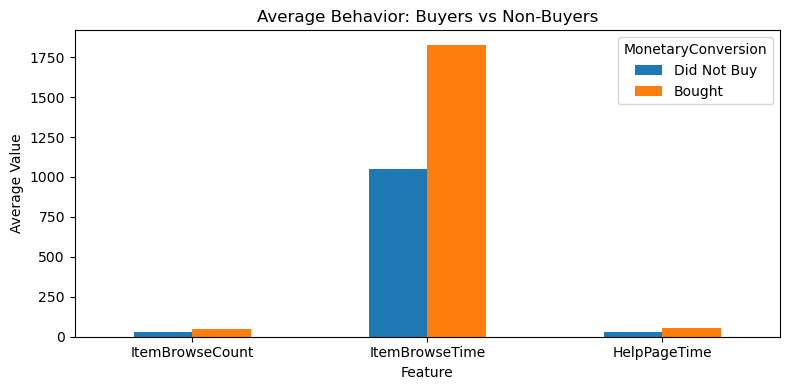

In [13]:
grouped = df_eda.groupby('MonetaryConversion')[['ItemBrowseCount', 'ItemBrowseTime', 'HelpPageTime']].mean()

grouped.T.plot(kind='bar', figsize=(8,4))  
plt.title("Average Behavior: Buyers vs Non-Buyers")   
plt.ylabel("Average Value")                           
plt.xlabel("Feature")                                
plt.xticks(rotation=0)                               
plt.legend(['Did Not Buy', 'Bought'], title='MonetaryConversion')
plt.tight_layout()                                    
plt.show()            

### Conversion Rate by User Platform

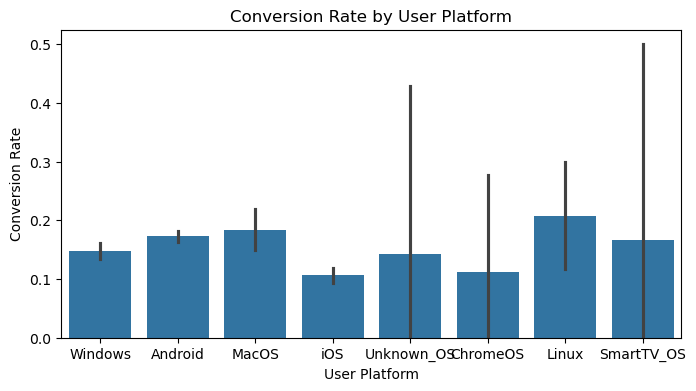

In [14]:
#UserPlatformID (Windows, Mac, iOS, Android, etc.)
plt.figure(figsize=(8,4))
sns.barplot(
    x='UserPlatformID', 
    y='MonetaryConversion', 
    data=df_eda,
    estimator=lambda x: sum(x)/len(x) # conversion rate %
)
plt.title("Conversion Rate by User Platform")
plt.ylabel("Conversion Rate")
plt.xlabel("User Platform")
plt.show()

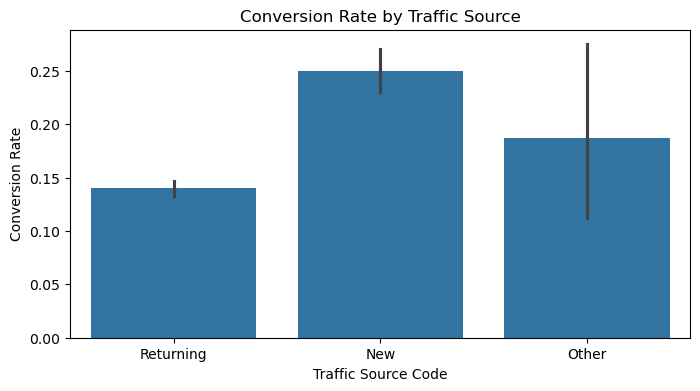

In [15]:
#UserCategory (e.g., New, Returning, or Loyal)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(
    x='UserCategory', 
    y='MonetaryConversion', 
    data=df_eda,
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Conversion Rate by Traffic Source")
plt.ylabel("Conversion Rate")
plt.xlabel("Traffic Source Code")
plt.show()

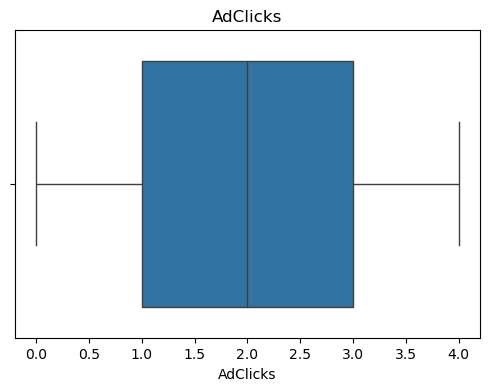

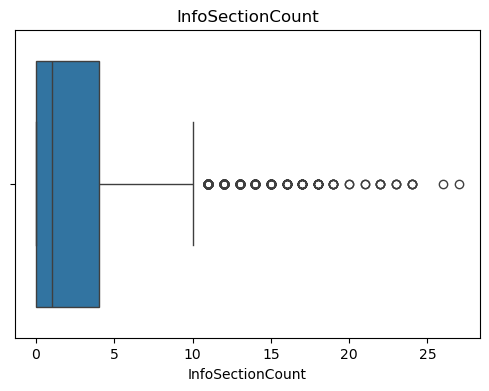

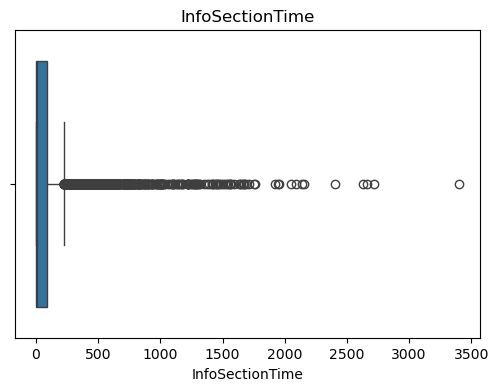

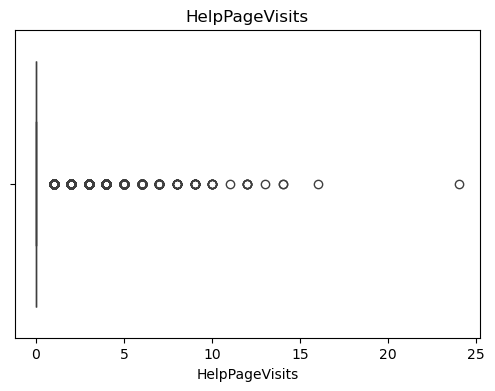

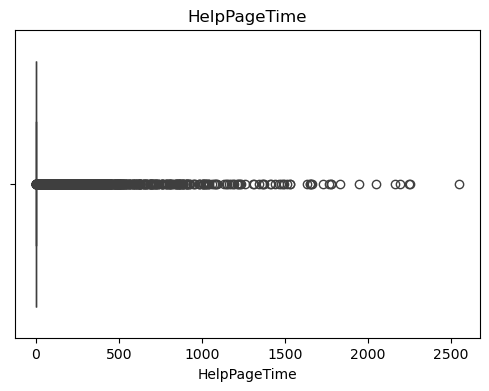

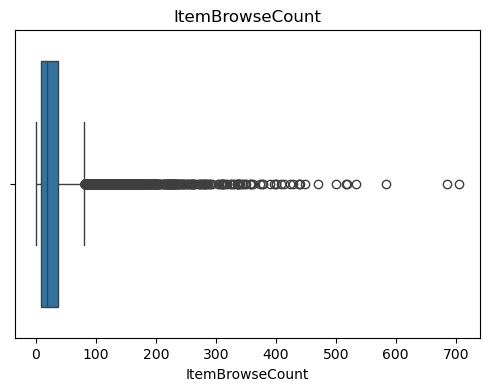

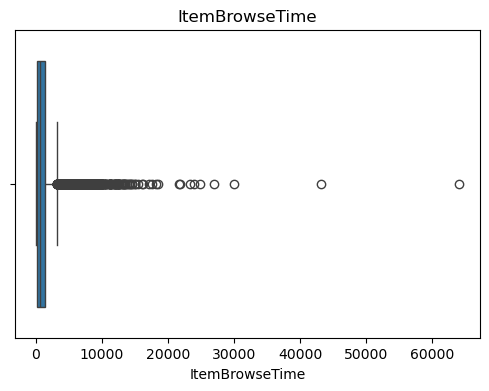

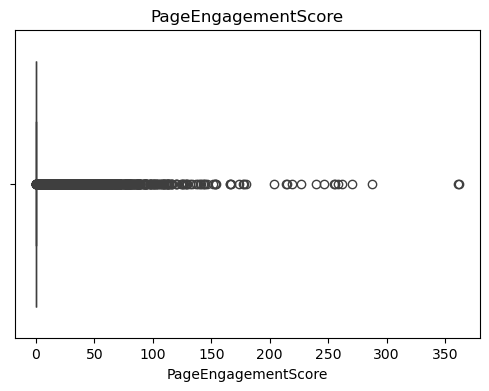

In [16]:
non_category_cols = [
    'AdClicks', 'InfoSectionCount', 'InfoSectionTime', 'HelpPageVisits', 
    'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime', 'PageEngagementScore'
]

for col in non_category_cols:
    plt.figure(figsize=(6, 4))     
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.show()

### Feature Correlation Analysis (Numerical Features)

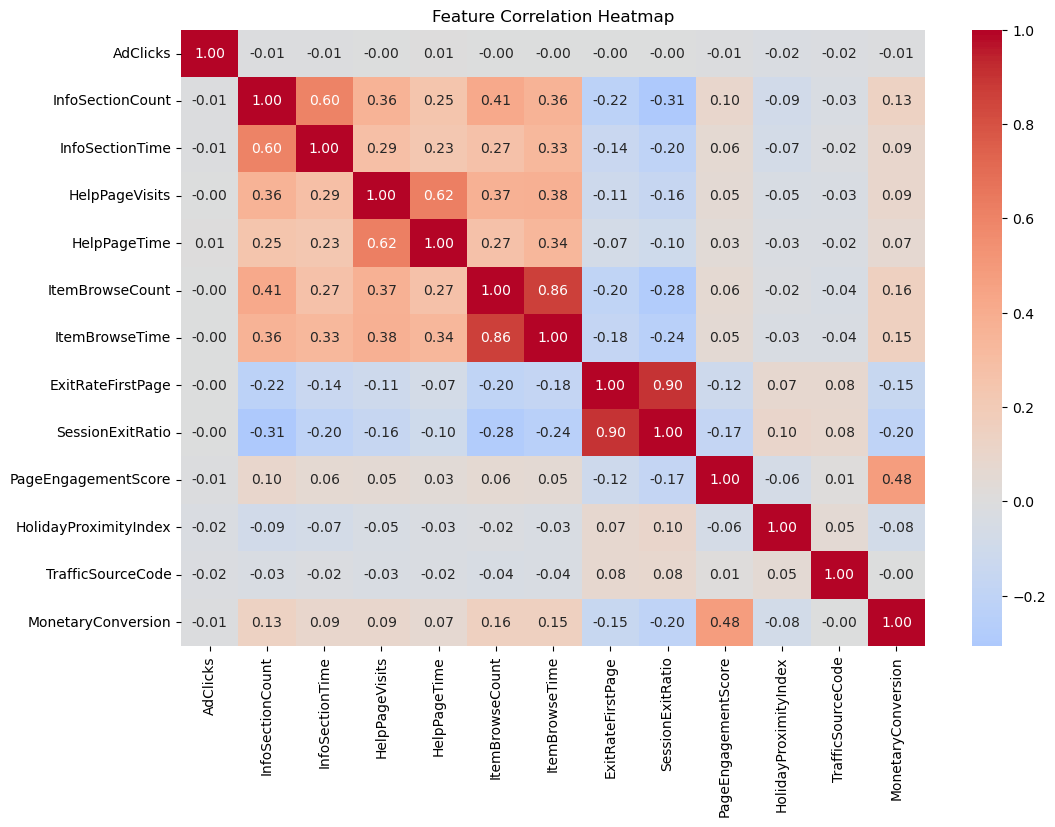

In [17]:
numeric_df = df_eda.select_dtypes(include=['number']) 
corr = numeric_df.corr() 

#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    annot=True,           
    cmap='coolwarm',       
    fmt=".2f",             
    center=0              
)
plt.title("Feature Correlation Heatmap")
plt.show()

## Feature Selection & Data Preparation for Modeling

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd

#### 1. Selecting features based on EDA (5 best correlated with MonetaryConversion)

In [19]:
features = [
    'PageEngagementScore',
    'ItemBrowseCount',
    'ItemBrowseTime',
    'HelpPageTime',
    'UserPlatformID',        # categorical
    'UserCategory',          # categorical
    'TrafficSourceCode'      # categorical codes
]
target = 'MonetaryConversion'

#### 2. Encoding categorical features

In [20]:
X = df_eda[features]
X = pd.get_dummies(X, columns=['UserPlatformID', 'UserCategory', 'TrafficSourceCode'], drop_first=True) #one-hot encoding
y = df_eda[target]

#### 3. Train/test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (9864, 32)
Test shape: (2466, 32)


In [22]:
for col in X.columns:
    print(col)

PageEngagementScore
ItemBrowseCount
ItemBrowseTime
HelpPageTime
UserPlatformID_ChromeOS
UserPlatformID_Linux
UserPlatformID_MacOS
UserPlatformID_SmartTV_OS
UserPlatformID_Unknown_OS
UserPlatformID_Windows
UserPlatformID_iOS
UserCategory_Other
UserCategory_Returning
TrafficSourceCode_2.0
TrafficSourceCode_3.0
TrafficSourceCode_4.0
TrafficSourceCode_5.0
TrafficSourceCode_6.0
TrafficSourceCode_7.0
TrafficSourceCode_8.0
TrafficSourceCode_9.0
TrafficSourceCode_10.0
TrafficSourceCode_11.0
TrafficSourceCode_12.0
TrafficSourceCode_13.0
TrafficSourceCode_14.0
TrafficSourceCode_15.0
TrafficSourceCode_16.0
TrafficSourceCode_17.0
TrafficSourceCode_18.0
TrafficSourceCode_19.0
TrafficSourceCode_20.0


In [23]:
X = X.astype(int)
X.head()

,PageEngagementScore,ItemBrowseCount,ItemBrowseTime,HelpPageTime,UserPlatformID_ChromeOS,UserPlatformID_Linux,UserPlatformID_MacOS,UserPlatformID_SmartTV_OS,UserPlatformID_Unknown_OS,UserPlatformID_Windows,...,TrafficSourceCode_11.0,TrafficSourceCode_12.0,TrafficSourceCode_13.0,TrafficSourceCode_14.0,TrafficSourceCode_15.0,TrafficSourceCode_16.0,TrafficSourceCode_17.0,TrafficSourceCode_18.0,TrafficSourceCode_19.0,TrafficSourceCode_20.0
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2,64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,10,627,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X[['TrafficSourceCode_2.0', 'TrafficSourceCode_3.0']].head()

,TrafficSourceCode_2.0,TrafficSourceCode_3.0
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0


In [25]:
X.shape    

(12330, 32)

## Building and Evaluating a Baseline Model (Logistic Regression)

Accuracy: 0.8787510137875101
ROC AUC: 0.8620064615972103

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.73      0.35      0.47       382

    accuracy                           0.88      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.87      0.88      0.86      2466

Confusion Matrix:


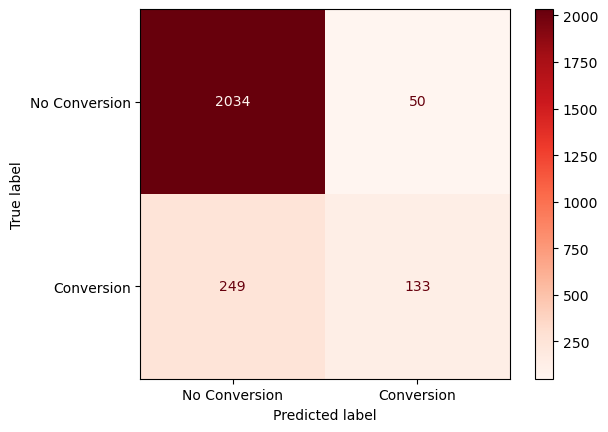

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Instantiating the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Evaluating
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# display confusion matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred, 
    display_labels=['No Conversion', 'Conversion'], 
    cmap='Reds', values_format='d'
)

#### Key Observations 
##### 1. When the model predicts "Conversion," it is correct 73% of the time (precision for class 1).
##### 2. Only 50 people were wrongly predicted as converters (false positives).
##### 3. Out of 382 real conversions, the model missed 249 of them (false negatives), which means it caught just 133.
##### 4. The model’s ability to tell converters from non-converters is strong, with a ROC-AUC score of 0.86.

#### Overall, the model can help find some people likely to convert, but it misses most actual converters. If missing many converters is acceptable, this model can be useful.

## Hyperparameter Tuning for Logistic Regression (with GridSearchCV)

Best parameters found: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.8592862935928629
ROC AUC: 0.8656706293776569
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2084
           1       0.54      0.67      0.60       382

    accuracy                           0.86      2466
   macro avg       0.74      0.78      0.75      2466
weighted avg       0.87      0.86      0.87      2466

Confusion Matrix:


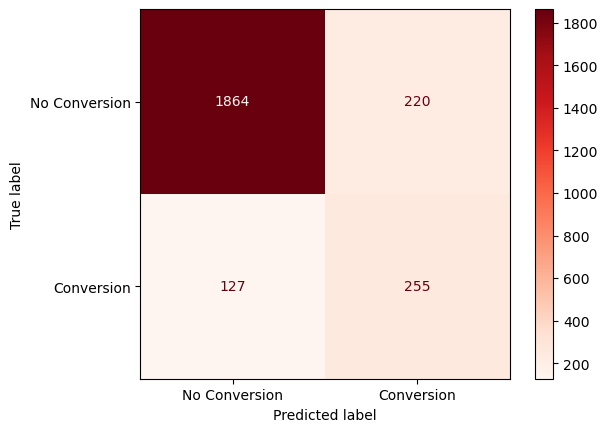

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the model (liblinear - a solver suitable for small datasets and supports L1 and L2 regularization.)
model = LogisticRegression(solver='liblinear')

# Setting up dictionary of different hyperparameters for searching
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (Lower values = more regularization i.e. simpler model; higher = less)
    'penalty': ['l1', 'l2'],       # Types of regularization i.e. lasso and Ridge respt.
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}] # Class weights setting for minority class to 5x or 10x more.
}

# Setting up GridSearchCV object
grid_search_lr = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,              # cross-validation = 5 folds (splits training data into 5 parts, trains on 4, tests on 1, and repeats)
    scoring='f1',      # Optimizing for F1-score since it is good for imbalanced data
    n_jobs=-1          # Using all available processors to run parallely
)

# Fitting GridSearchCV on the training data
grid_search_lr.fit(X_train, y_train)

print(f"Best parameters found: {grid_search_lr.best_params_}")
best_model = grid_search_lr.best_estimator_

# Evaluating the best model on the test data
predictions = best_model.predict(X_test)
probas = best_model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"ROC AUC: {roc_auc_score(y_test, probas)}")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    predictions, 
    display_labels=['No Conversion', 'Conversion'], 
    cmap='Reds', 
    values_format='d'
)

#### Key Observations

##### 1. When the model predicts "Conversion", it is right 54% of the time.
##### 2. It misses 127 out of 382 real conversions (i.e., recall for conversions is 67%).
##### 3. It incorrectly predicts 220 people as "Conversion" when they are not (false positives).
##### 4. It is very accurate at identifying "No Conversion" cases (high precision and recall for class 0).

#### Overall, the model is good at spotting non-converters and has improved at finding converters compared to previous results

#### What changed after tuning?

##### 1. Recall for conversions (class 1) improved to 67% (from much lower previously).
##### 2. Precision for conversions is moderate (54%), meaning there are still some false positives.

#### Overall, the model is much better at catching people who convert than before tuning, though it still makes some mistakes.
#### The confusion matrix shows more conversions are correctly found, but some non-converters are now being flagged as converters.

## Random Forest

Accuracy: 0.8751013787510138
ROC AUC: 0.8623135884475083
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2084
           1       0.63      0.48      0.54       382

    accuracy                           0.88      2466
   macro avg       0.77      0.71      0.73      2466
weighted avg       0.86      0.88      0.87      2466

Confusion Matrix:


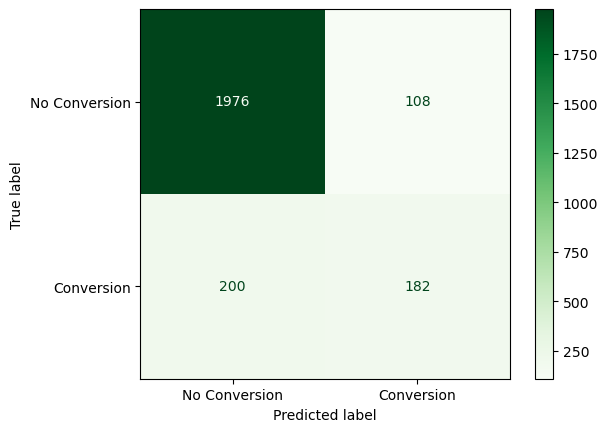

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

# Instantiate and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)
rf_probas = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_probas)}")
print(classification_report(y_test, rf_predictions))

print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    rf_predictions, 
    display_labels=['No Conversion', 'Conversion'], 
    cmap='Greens', 
    values_format='d'
)

#### Key Observations

##### 1. The model is very good at identifying non-converters (95% recall for class 0).
##### 2. When the model says someone will convert, it’s correct 63% of the time (precision for class 1 is higher than logistic regression).
##### 3. It finds 182 out of 382 actual converters (recall for class 1 = 48%).
##### 4. Fewer false positives (108) and more false negatives (200) compared to logistic regression.
                                              
#### Overall, compared to logistic regression, Random Forest increases precision for conversions but catches fewer actual converters (lower recall for class 1).

## Hyperparameter Tuning for Random Forest (with GridSearchCV)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found: {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8730738037307381
ROC AUC: 0.8748831787440584
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2084
           1       0.57      0.73      0.64       382

    accuracy                           0.87      2466
   macro avg       0.76      0.81      0.78      2466
weighted avg       0.89      0.87      0.88      2466

Confusion Matrix:


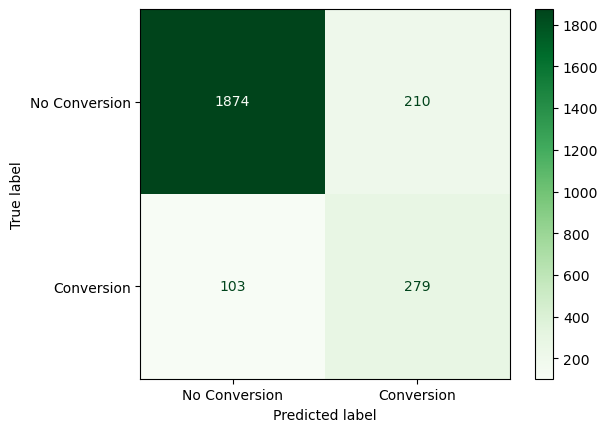

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],   # Number of trees
    'criterion': ['gini'],
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5],  # Min samples to split a node
    'min_samples_leaf': [1, 2],   # Min samples at a leaf node
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}]  
}

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                 
    scoring='f1',         
    n_jobs=-1,            
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

print(f"Best parameters found: {grid_search_rf.best_params_}")
best_rf_model = grid_search_rf.best_estimator_

rf_predictions = best_rf_model.predict(X_test)
rf_probas = best_rf_model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_probas)}")
print(classification_report(y_test, rf_predictions))

print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    rf_predictions, 
    display_labels=['No Conversion', 'Conversion'], 
    cmap='Greens', 
    values_format='d'
)

#### Key Observations

##### 1. Recall for class 1 (conversions) improved to 73% (from 48% before tuning).
##### 2. Precision for class 1 also improved a bit to 57%.
##### 3. False negatives for conversions dropped (from 200 to 103)—the model is catching a lot more converters!
##### 4. A small increase in false positives (predicting conversion when it’s not), but this is often an acceptable trade-off in imbalanced cases.

#### Overall, the model is now much better at identifying true converters, thanks to tuning, especially the class weight.

#### Insights from Logistic Regression and Random Forest (both tuned/untuned) used above

##### 1. Tuned Random Forest has the highest recall for conversions, making it the most suitable if it’s critical to identify as many converters as possible, even at the cost of more false positives.
##### 2. Random Forest (untuned) is best if we want higher precision and can afford to miss more actual converters.
##### 3. Logistic Regression provides a good baseline and is interpretable, but doesn’t outperform tuned Random Forest for this task.

#### Lets perform XGBoost to see if it outperforms both logistic regression and Random Forest.

## XGBoost

In [30]:
#!pip install xgboost

Accuracy: 0.8779399837793999
ROC AUC: 0.866771010240074
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2084
           1       0.63      0.51      0.56       382

    accuracy                           0.88      2466
   macro avg       0.77      0.73      0.75      2466
weighted avg       0.87      0.88      0.87      2466



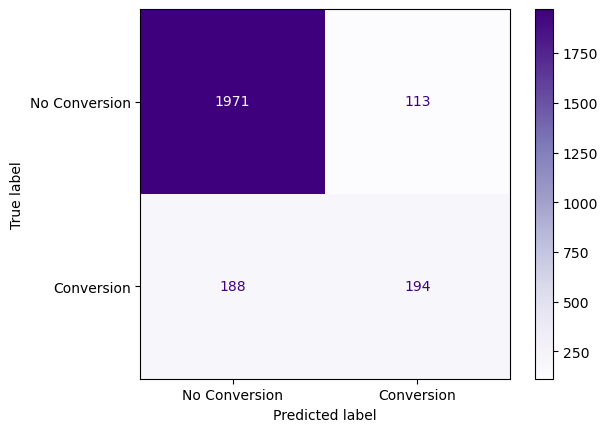

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

# Instantiating XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fitting model
xgb_model.fit(X_train, y_train)

# Predicting
xgb_predictions = xgb_model.predict(X_test)
xgb_probas = xgb_model.predict_proba(X_test)[:, 1]

# Evaluating
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions)}")
print(f"ROC AUC: {roc_auc_score(y_test, xgb_probas)}")
print(classification_report(y_test, xgb_predictions))

ConfusionMatrixDisplay.from_predictions(
    y_test, 
    xgb_predictions, 
    display_labels=['No Conversion', 'Conversion'], 
    cmap='Purples', 
    values_format='d'
)

#### Key Observations

##### 1. XGBoost achieves high precision for conversions (on par with Random Forest default), but recall (ability to find converters) is moderate (51%), better than RF default but lower than tuned RF.
##### 2. It has the lowest number of false positives (FP = 113) among all models, which means it produces fewer false alarms.
    
#### Overall accuracy and ROC AUC are similar to Random Forest results.

## Hyperparameter Tuning for XGBoost (with GridSearchCV)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5}
Accuracy: 0.8682076236820763
ROC AUC: 0.8730900352724825
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2084
           1       0.56      0.75      0.64       382

    accuracy                           0.87      2466
   macro avg       0.75      0.82      0.78      2466
weighted avg       0.89      0.87      0.88      2466



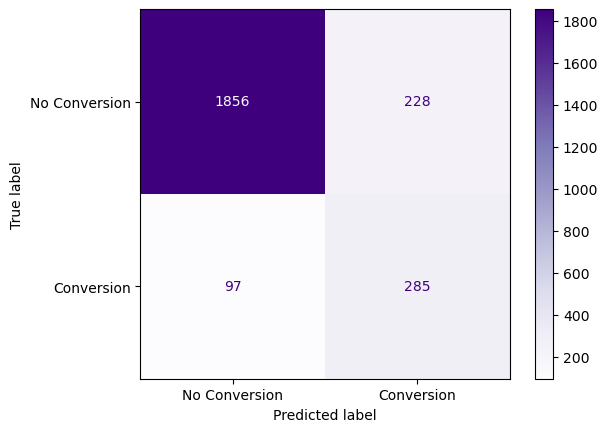

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.01],
    'scale_pos_weight': [1, 5, 10]  # Helps with class imbalance
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)

print(f"Best parameters found: {grid_search_xgb.best_params_}")
best_xgb_model = grid_search_xgb.best_estimator_

xgb_predictions = best_xgb_model.predict(X_test)
xgb_probas = best_xgb_model.predict_proba(X_test)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions)}")
print(f"ROC AUC: {roc_auc_score(y_test, xgb_probas)}")
print(classification_report(y_test, xgb_predictions))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    xgb_predictions, 
    display_labels=['No Conversion', 'Conversion'], 
    cmap='Purples', 
    values_format='d'
)

#### Key Observations

##### 1. After tuning, XGBoost achieved the highest recall (0.75) for conversions among all models so far, and a good F1-score (0.64).
##### 2. Precision is similar to other tuned models (0.56), and overall accuracy and ROC AUC are strong.
##### 3. XGBoost tuned is best at catching actual converters, making it highly effective if recall is our top priority.
##### 4. There is a trade-off: a slightly higher number of false positives (FP = 228), but this is often acceptable in practical scenarios where missing a converter is costlier.

## Feature Importance Analysis (Tuned XGBoost)

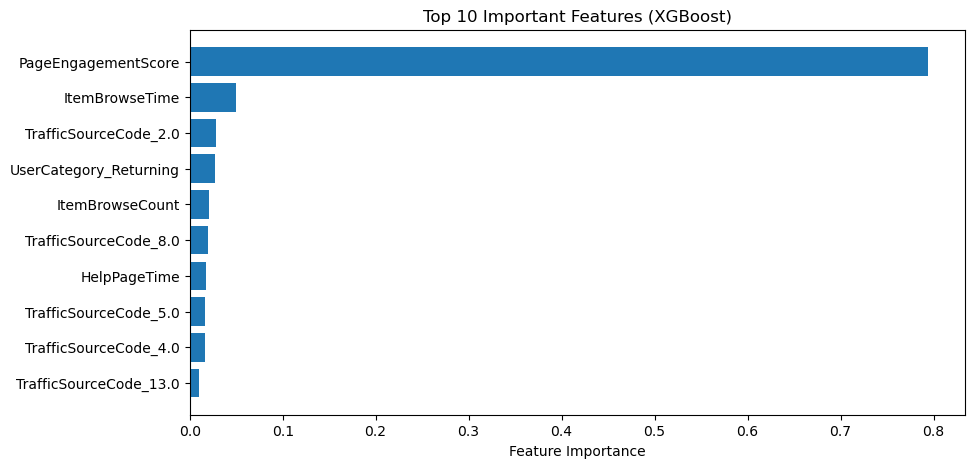

In [33]:
importances = best_xgb_model.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
plt.barh(feat_imp_df['Feature'][:10][::-1], feat_imp_df['Importance'][:10][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features (XGBoost)')
plt.show()

## Conclusion

##### We evaluated several machine learning models like Logistic Regression, Random Forest, and XGBoost for predicting conversions in an imbalanced dataset. Each model was tested both with default settings and after hyperparameter tuning to optimize recall and overall performance for the minority class (conversions).

## Key findings:

##### 1. Tuned Random Forest and Tuned XGBoost both achieved high recall for conversions (0.73 and 0.75, respectively), meaning they were most effective at identifying actual converters.
##### 2. Tuned XGBoost had the highest recall and F1-score for conversions, making it the best overall performer for our business goal of minimizing missed conversions. Precision was moderate, which is an acceptable trade-off given the focus on recall.
##### 3. Logistic Regression (tuned) provided a strong and interpretable baseline, but was outperformed by ensemble methods in both recall and F1-score.
##### 4. Default models (Random Forest, XGBoost) had higher precision but much lower recall for conversions, making them less suitable when recall is a priority.

#### For this problem, tuned XGBoost is the most effective model as it best balances recall and precision for the minority class. If interpretability is more important, tuned Logistic Regression is a solid alternative. For business cases where it’s critical to identify as many conversions as possible, the tuned XGBoost model should be deployed.